This code provides a general function that takes in a .log file and performs a calculation 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
def read_data(file_name):
    #This is specific to a file with no headings and in the form of:  k20_kf_5/2NN_0.00_0.0_20_5.out FL 9.01759e-06 1m43.863s
    f = open(file_name, 'r')
    data = []
    for line in f:
        l = line.split()

        if len(l) != 4:
            continue
        else:

            file= l[0].split("/")[-1].split("_") 
            U = float(file[1])  #stores U parameter
            J = float(file[2])  # stores J parameter 
            nk = int(file[3])   #stores nk number points
            nkf = int(file[4].split(".")[0])   #stores nkf number points

            time= l[3].split("m")   #time taken to perform the calculation
            seconds = float(time[0])*60 + float(time[1].split("s")[0])
            final_data = [U, J, nk, nkf,l[1],float(l[2]),seconds]  #l1 and l2 here are the Tc and the dominanting phase
            data.append(final_data)

    return data



In [4]:
def plot_U_J_Voronoi(inputname,model):
    # print(inputname,outputname,"PYTHON",os.getcwd())
    data = read_data(inputname)
    # Triangular grid
    kb_ev = 8.6173303e-5 #eV
    x = []  #stores Us
    y = []  #stores Js
    groundstate = []
    points = []
    z = []
    for d in data:
        x.append(d[0])
        y.append(d[1])
        points.append([d[0],d[1]])  #U,J vector
        groundstate.append(d[4])  #Stores GS
        z.append((d[5])/kb_ev)  #stores Tc


    #convert ground_State to numbers
    groundstate_num = []
    for i in range(len(groundstate)):
        if groundstate[i] == "FL":
            groundstate_num.append(0)
        elif groundstate[i] == "SC":
            groundstate_num.append(1)
        elif groundstate[i] == "SDW":
            groundstate_num.append(2)
        elif groundstate[i] == "CDW":
            groundstate_num.append(3)
        else:
            groundstate_num.append(-1)


    max_U = max(x)
    min_U = min(x)
    max_J = max(y)
    min_J = min(y)

    #Add in boundaries
    for i in np.linspace(min_U,max_U,201):
        points.append([i,min_J-1])
        groundstate.append("Empty")
        groundstate_num.append(-1) 
    
    for i in np.linspace(min_J,max_J,201):
        points.append([min_U-1,i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_U,max_U,201):
        points.append([i,max_J+1])
        groundstate.append("Empty")
        groundstate_num.append(-1) 
    
    for i in np.linspace(min_J,max_J,201):
        points.append([max_U+1,i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    points = np.array(points)
    categories = np.array(groundstate_num)  # Random categories (0, 1, 2, 3)
    
    # Compute Voronoi diagram
    vor = Voronoi(points)


    fig, ax = plt.subplots(figsize=(8, 6))


    # Highlight points with categories
    for i in range(len(x)):
        if groundstate[i] == "SC":
            colour = 'blue'
        elif groundstate[i] == "CDW":
            colour = 'orange'
        elif groundstate[i] == "FL":
            colour="black"
        elif groundstate[i] == "SDW":
            colour="green"
        else:
            colour="white"
        ax.scatter(x[i], y[i], c=colour, s=20,marker="x")


    lines = []
    line_magnitudes = []
    # Identify boundaries between different categories, calculate their magnitudes
    for ridge, (p1, p2) in zip(vor.ridge_vertices, vor.ridge_points):
        if ridge[0] == -1 or ridge[1] == -1:  # Skip infinite ridges
            continue
        if categories[p1] != categories[p2]:  # Different categories
            line = vor.vertices[ridge] ##[[x_start,y_start],[x_end,y_end]]
            lines.append(line)
            line_magnitudes.append(np.sqrt((line[1][0]-line[0][0])**2 + (line[1][1]-line[0][1])**2))
            ax.plot(line[:, 0], line[:, 1], 'black', linewidth=1)
    
    # Sort lines by their length
    sorted_lines = sorted(lines, key=lambda line: ((line[1][0] - line[0][0])**2 + (line[1][1] - line[0][1])**2)**0.5)
    sorted_lines = sorted_lines[::-1] #this puts longest lines first

    filtered_lines = []
    for line in sorted_lines:
        if ((min_U <line[0][0] < max_U) and (min_J < line[0][1] < max_J) and (min_U <line[1][0] < max_U) and (min_J < line[1][1] < max_J)):
            filtered_lines.append(line)

    ax.set_xlabel("U /eV")
    ax.set_ylabel(f"$/mu$ /eV")
    ax.set_title(f"{model}")
    ax.grid()


    

    







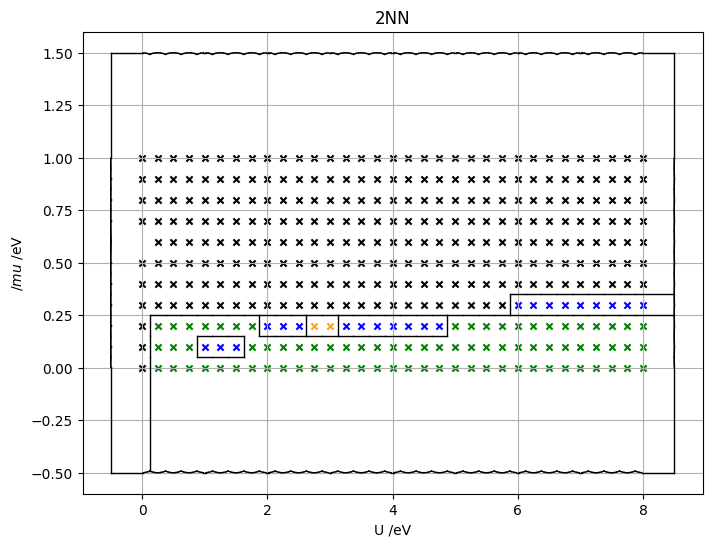

In [5]:
plot_U_J_Voronoi("2NNb.log","2NN")


In [6]:
#form factor convergence- this section test the form factor convergence for values from 1-10 amstrong
def read_dataff(file_name):
    #This is specific to a file with no headings and in the form of:  k20_kf_5/2NN_0.00_0.0_20_5.out FL 9.01759e-06 1m43.863s
    f = open(file_name, 'r')
    data = []
    for line in f:
        l = line.split()

        if len(l) != 4:
            continue
        else:

            file= l[0].split("/")[-1].split("_") 
            U = float(file[1])  #stores U parameter
            J = float(file[2])  # stores J parameter 
            ff = float(file[3])
            nk = int(file[4])   #stores nk number points
            nkf = int(file[5].split(".")[0])   #stores nkf number points

            time= l[3].split("m")   #time taken to perform the calculation
            seconds = float(time[0])*60 + float(time[1].split("s")[0])
            final_data = [U, J, ff, nk, nkf,l[1],float(l[2]),seconds]  #l1 and l2 here are the Tc and the dominanting phase
            data.append(final_data)

    return data



def plot_ff_convergence(inputname, model):
    data = read_dataff(inputname)

    #kb_ev = 8.6173303e-5 #eV
    kb_ev = 1
    Us = []  #stores Us
    mus = []  #stores Js
    groundstate = []
    points = []
    tc = []
    ffs =[]
    for d in data:
        Us.append(d[0])
        mus.append(d[1])
        points.append([d[0],d[1]])  #U,J vector
        groundstate.append(d[5])  #Stores GS
        ffs.append(d[2])
        tc.append((d[6])/kb_ev)  #stores Tc
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.grid()


    # Color mapping
    # Color mapping
    color_map = {
        "SC": "blue",
        "CDW": "orange",
        "FL": "black",
        "SDW": "green"
    }

    labels_added = {}

    for i in range(len(ffs)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used

        ax.scatter(ffs[i], tc[i], c=colour, s=20, marker="x", label=label)



   # for i in range(len(ffs)):
    
#    if groundstate[i] == "SC":
 #           colour = 'blue'
  #      elif groundstate[i] == "CDW":
   #         colour = 'orange'
    #    elif groundstate[i] == "FL":
     #       colour="black"
      #  elif groundstate[i] == "SDW":
       #     colour="green"
        #else:
         #   colour="white"
        #ax.scatter(ffs[i], tc[i], c=colour, s=20,marker="x")

    U = Us[0]
    mu = mus[0]

    ax.set_title(f"Form factor convergence for the {model} with U = {U} and $\mu$ = {mu}")
    ax.set_xlabel("Form factor ($\AA$)")
    ax.set_ylabel("Tc (eV)")
    ax.plot(ffs, tc, color = 'black', linestyle = '--')
    ax.legend()


    fig, ax = plt.subplots(figsize=(16, 6))


    for i in range(len(ffs)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used

        ax.scatter(ffs[i], tc[i], c=colour, s=20, marker="x", label=label)


    ax.set_xlim(3,10)



    plt.show



    

    

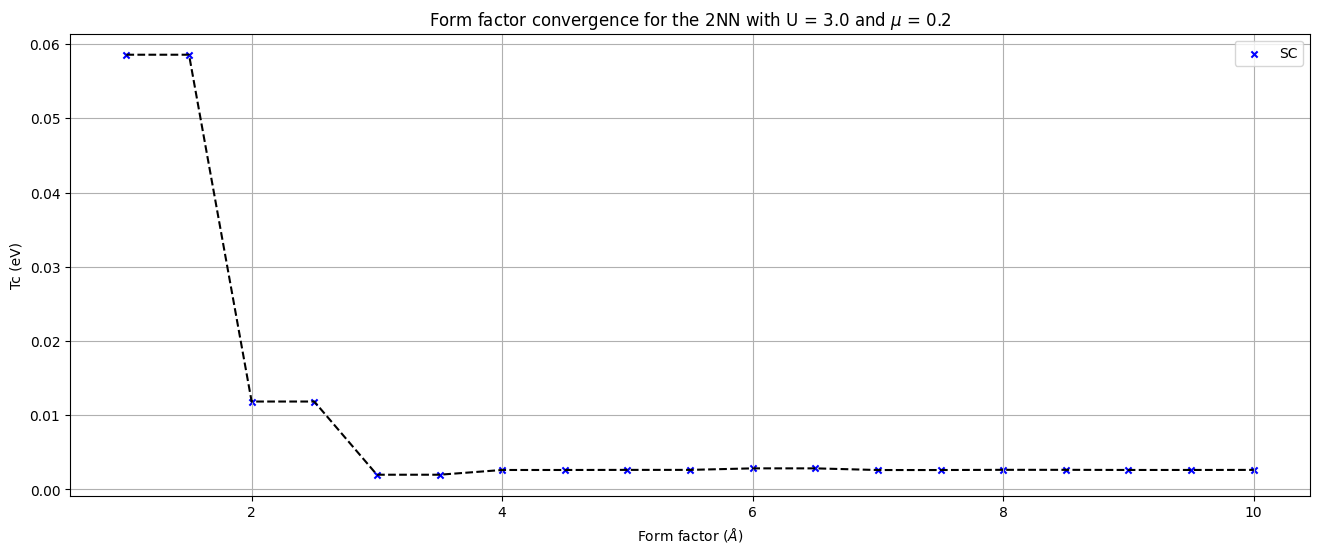

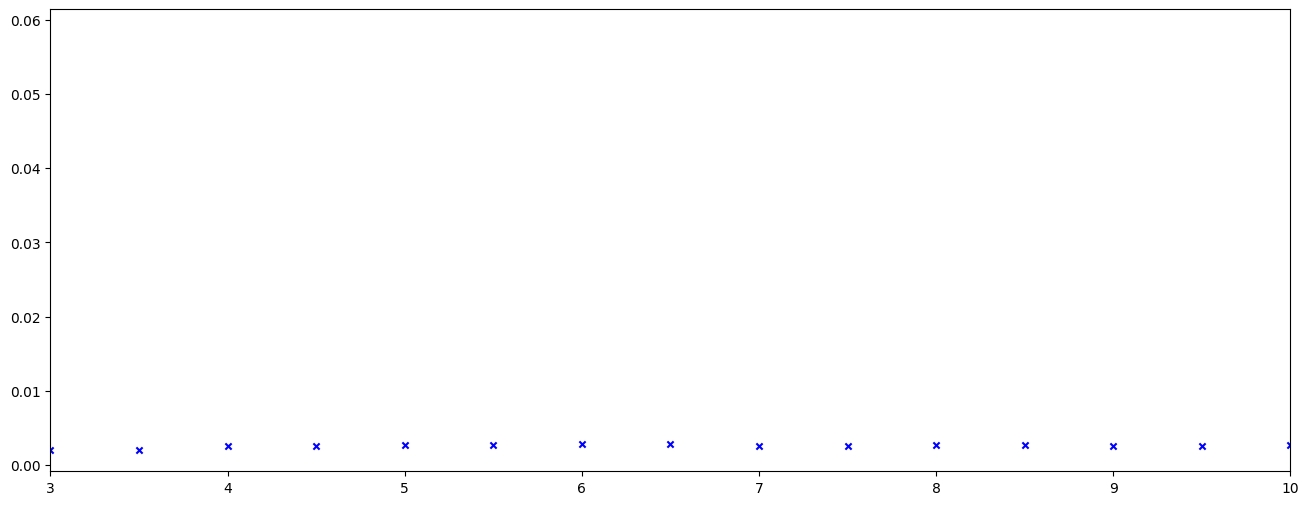

In [7]:
plot_ff_convergence("2NN_form.log", "2NN")

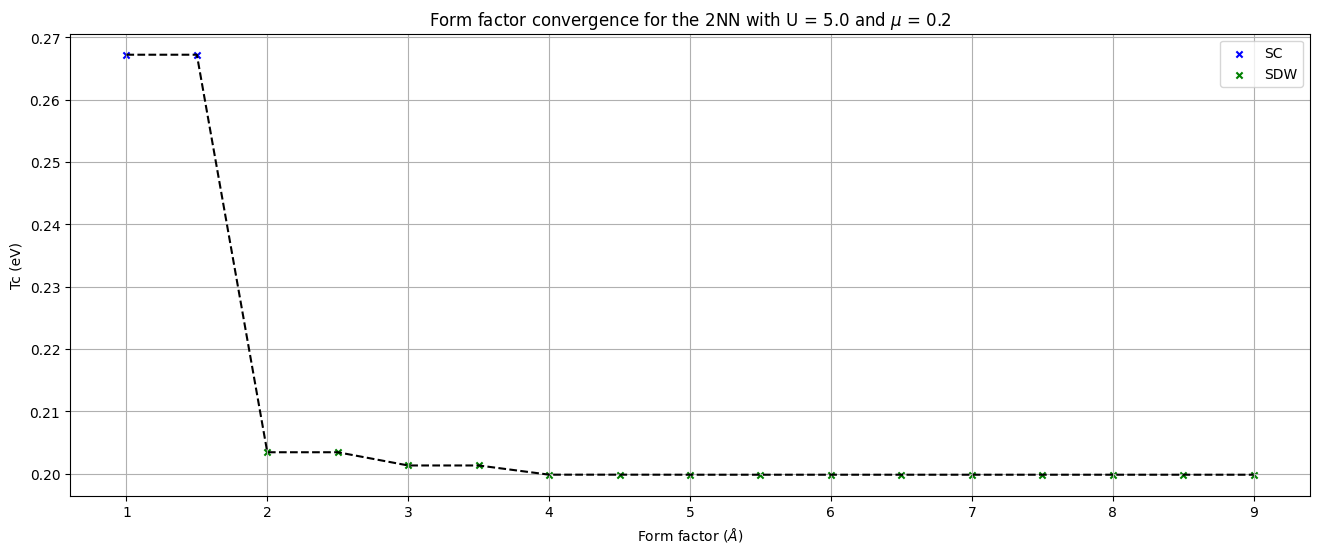

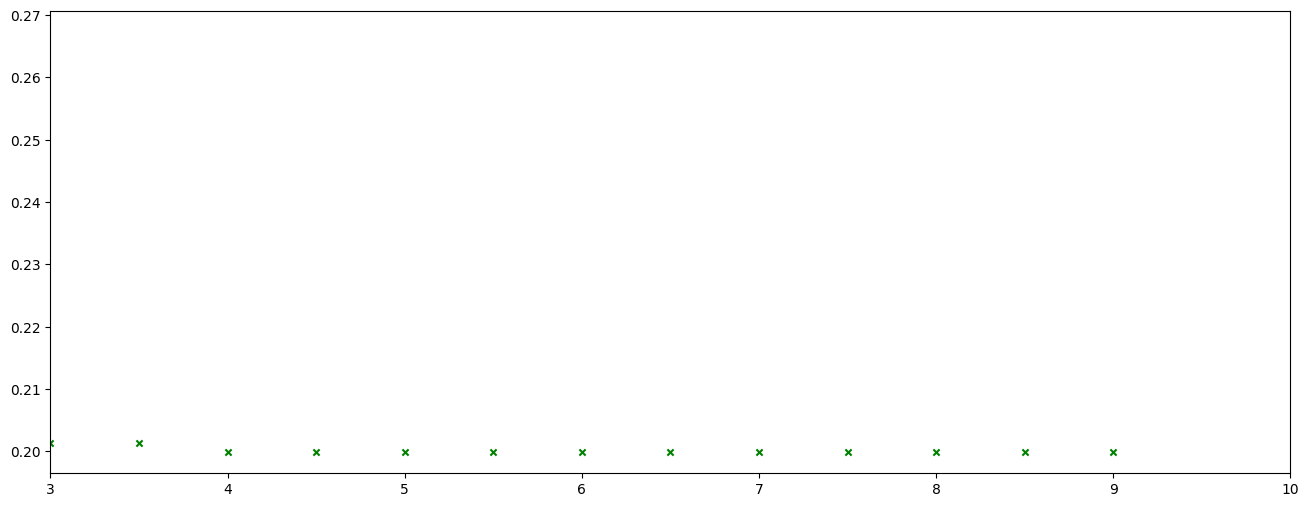

In [8]:
plot_ff_convergence("2NN_ff2.log", "2NN")

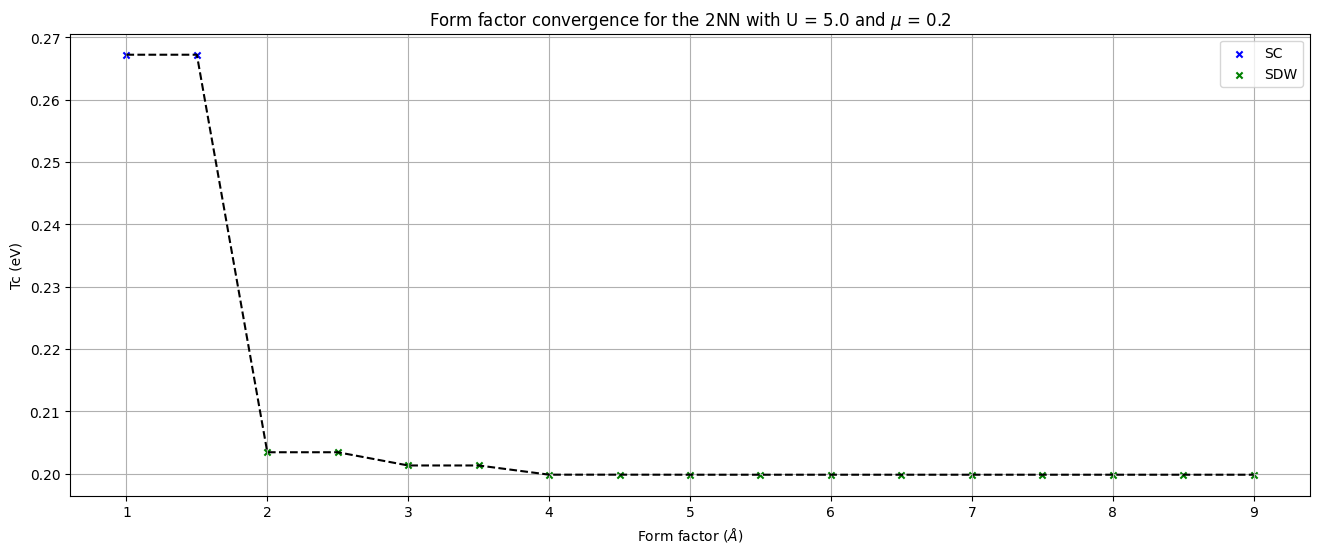

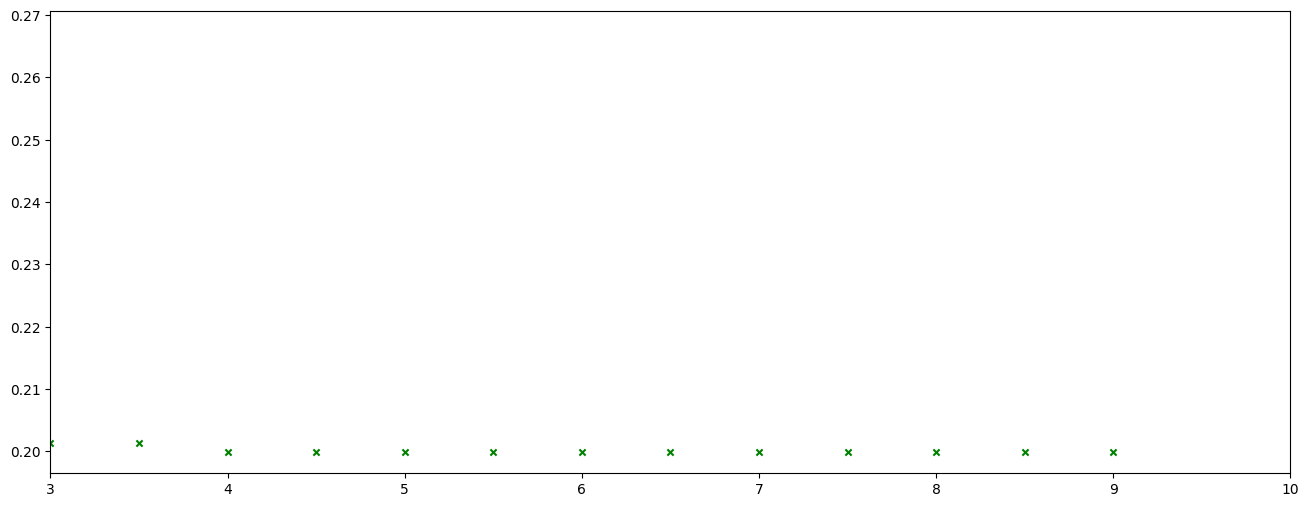

In [9]:
plot_ff_convergence("2NN_ff2.log", "2NN")

In [10]:
# k convergence
import pandas as pd

def plot_kconv(inputname, model):
     data = read_data(inputname)

     groundstate = []
     points = []
     tc = []
     nk =[]
     nkf = []
     times = []
     for d in data:
          Us = d[0]
          mu = d[1]
          points.append([d[2],d[3]])  #nk, nkf vector
          groundstate.append(d[4])  #Stores GS
          nk.append(d[2])
          nkf.append(d[3])
          tc.append(d[5])  #stores Tc
          times.append(d[6])


     df = pd.DataFrame({
         'nk': nk,
         'nkf': nkf,
         'tc(eV)': tc,
         'groundstate': groundstate,
         'time (s)': times
     })

     return df

  
     




In [11]:
plot_kconv("2NNktest_5_0.2.log", "2NN")

,nk,nkf,tc(eV),groundstate,time (s)
0,2,2,0.203213,SDW,0.139
1,4,2,0.199859,SDW,7.368
2,4,4,0.199860,SDW,8.961
3,8,2,0.199847,SDW,60.360
4,8,4,0.199847,SDW,68.027
5,8,8,0.199847,SDW,99.179
6,16,2,0.199847,SDW,140.675
7,16,4,0.199847,SDW,167.449
8,16,8,0.199847,SDW,286.498
9,16,16,0.199847,SDW,771.161


In [12]:
plot_kconv("2NNktest_3_0.2.log", "2NN")

,nk,nkf,tc(eV),groundstate,time (s)
0,2,2,0.027886,SC,0.142
1,4,2,0.005460,SDW,9.604
2,4,4,0.003368,SC,12.746
3,8,2,0.003397,SC,85.542
4,8,4,0.002660,SC,99.193
5,8,8,0.002566,SC,138.899
6,16,2,0.002642,SC,188.337
7,16,4,0.002494,SC,234.064
8,16,8,0.002462,SC,417.636
9,16,16,0.002461,SC,1136.301


In [13]:
# plot U= 5, mu =0.2 again but now account for the corrected TBM



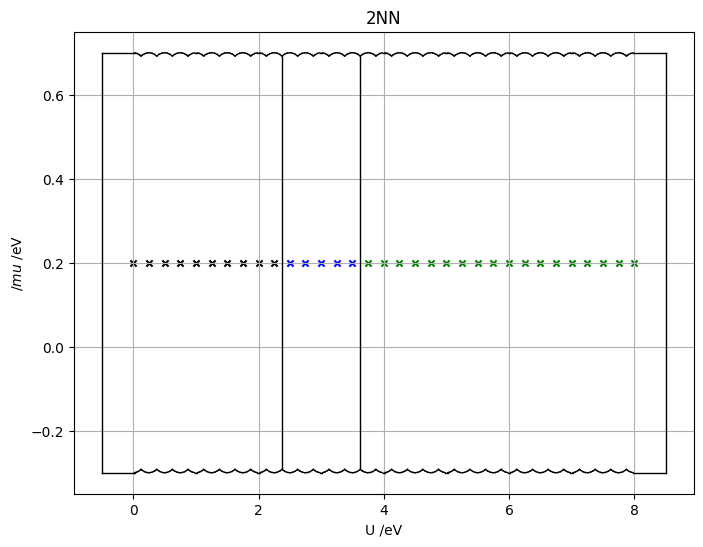

In [14]:
plot_U_J_Voronoi("2NNpd.log","2NN")

In [15]:
import pandas as pd
def plot_Tc(data):
    data = read_data(data)

    groundstate = []
    Us = []
    mu = []
    points = []
    tc = []
    nk =[]
    nkf = []
    times = []
    for d in data:
        Us.append(d[0])
        mu.append(d[1])
        points.append([d[2],d[3]])  #nk, nkf vector
        groundstate.append(d[4])  #Stores GS
        nk.append(d[2])
        nkf.append(d[3])
        tc.append(d[5])  #stores Tc
        times.append(d[6])


    df = pd.DataFrame({
        'U': Us,
        'mu':mu,
        'tc(eV)': tc,
        'groundstate': groundstate,
        'time (s)': times
     })
    
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.grid()

    color_map = {
        "SC": "blue",
        "CDW": "orange",
        "FL": "black",
        "SDW": "green"
    }

    labels_added = {}

    for i in range(len(Us)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used
        ax.scatter(Us[i], tc[i], c=colour, s=70, marker="x", label=label)

    ax.set_xlabel("U(eV)")
    ax.set_ylabel("Tc(eV)")
    ax.set_title(f"2NN model: Tc as a function of U for $\mu$= {mu[0]}")
    return df

,U,mu,tc(eV),groundstate,time (s)
0,0.00,0.2,0.000009,FL,618.351
1,0.25,0.2,0.000009,FL,602.685
2,0.50,0.2,0.000009,FL,600.905
3,0.75,0.2,0.000009,FL,598.126
4,1.00,0.2,0.000009,FL,599.987
5,1.25,0.2,0.000009,FL,605.179
6,1.50,0.2,0.000009,FL,599.448
7,1.75,0.2,0.000009,FL,604.484
8,2.00,0.2,0.000009,FL,603.422
9,2.25,0.2,0.000009,FL,606.006


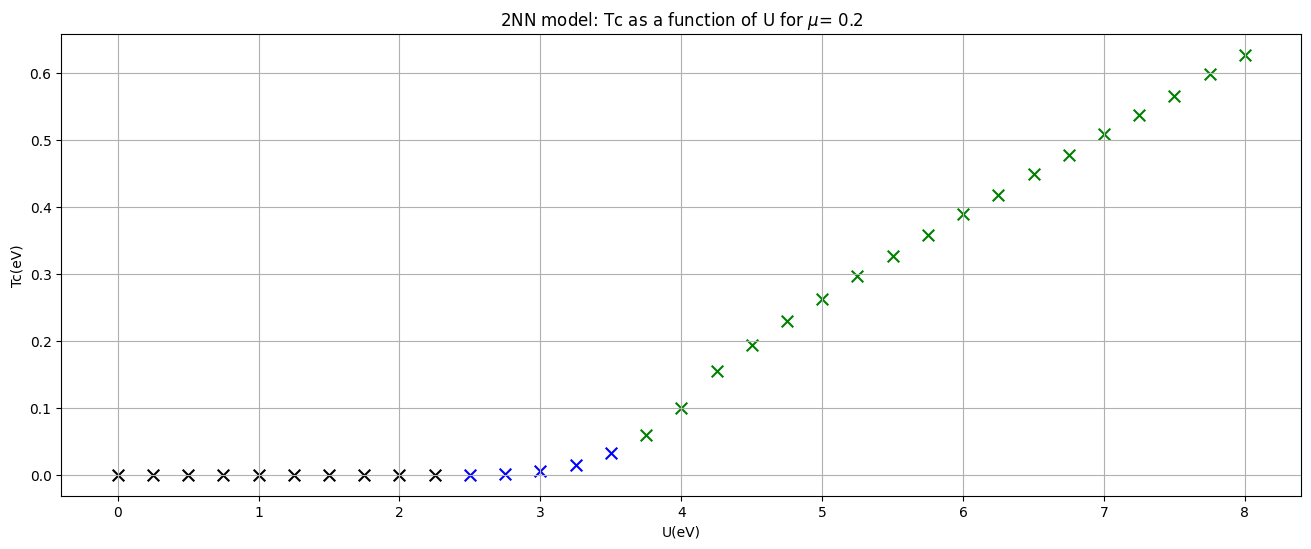

In [35]:
plot_Tc("2NNpd.log")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors

def lighten_color(color, factor=0.5):
    """Lighten the given color by a specified factor (0 = same, 1 = white)."""
    rgb = np.array(mcolors.to_rgb(color))
    return mcolors.to_rgba(rgb + (1 - rgb) * factor, alpha=0.5) 

In [3]:



 

def plot_U_J_Voronoi(inputname,model):
    # print(inputname,outputname,"PYTHON",os.getcwd())
    data = read_data(inputname)
    # Triangular grid
    kb_ev = 8.6173303e-5 #eV
    x = []  #stores Us
    y = []  #stores Js
    groundstate = []
    points = []
    z = []
    for d in data:
        x.append(d[0])
        y.append(d[1])
        points.append([d[0],d[1]])  #U,J vector
        groundstate.append(d[4])  #Stores GS
        z.append((d[5])/kb_ev)  #stores Tc


    #convert ground_State to numbers
    groundstate_num = []
    for i in range(len(groundstate)):
        if groundstate[i] == "FL":
            groundstate_num.append(0)
        elif groundstate[i] == "SC":
            groundstate_num.append(1)
        elif groundstate[i] == "SDW":
            groundstate_num.append(2)
        elif groundstate[i] == "CDW":
            groundstate_num.append(3)
        else:
            groundstate_num.append(-1)


    color_map = {
    "SC": 'blue',
    "CDW": 'orange',
    "FL": "black",
    "SDW": "green",
    "Empty": "white"
    }

    max_U = max(x)
    min_U = min(x)
    max_J = max(y)
    min_J = min(y)

# Add in boundaries
    for i in np.linspace(min_U, max_U, 201):
        points.append([i, min_J - 1])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_J, max_J, 201):
        points.append([min_U - 1, i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_U, max_U, 201):
        points.append([i, max_J + 1])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_J, max_J, 201):
        points.append([max_U + 1, i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    points = np.array(points)
    categories = np.array(groundstate_num)

# Compute Voronoi diagram
    vor = Voronoi(points)

    fig, ax = plt.subplots(figsize=(8, 6))

# Plot points with category colors
    for i in range(len(x)):
        colour = color_map.get(groundstate[i], "white")
        ax.scatter(x[i], y[i], c=colour, s=20, marker="x")

# **Fill Voronoi regions with lighter colors**
    patches = []
    for i, region in enumerate(vor.regions):
        if not -1 in region and len(region) > 0:  # Ignore open regions
            polygon_vertices = [vor.vertices[j] for j in region]

        # Find closest point to this region
            region_center = np.mean(polygon_vertices, axis=0)
            closest_idx = np.argmin(np.linalg.norm(points - region_center, axis=1))
            region_type = groundstate[closest_idx]  # Assign color based on closest classified point

            color = color_map.get(region_type, "white")  # Get marker color
            lighter_color = lighten_color(color, factor=0.6)  # Make it lighter

            polygon = Polygon(polygon_vertices, closed=True, edgecolor='none', facecolor=lighter_color)
            patches.append(polygon)

# Add filled regions to the plot
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p) 

def read_data(file_name):
    #This is specific to a file with no headings and in the form of:  k20_kf_5/2NN_0.00_0.0_20_5.out FL 9.01759e-06 1m43.863s
    f = open(file_name, 'r')
    data = []
    for line in f:
        l = line.split()

        if len(l) != 4:
            continue
        else:

            file= l[0].split("/")[-1].split("_") 
            U = float(file[1])  #stores U parameter
            J = float(file[2])  # stores J parameter 
            nk = int(file[3])   #stores nk number points
            nkf = int(file[4].split(".")[0])   #stores nkf number points

            time= l[3].split("m")   #time taken to perform the calculation
            seconds = float(time[0])*60 + float(time[1].split("s")[0])
            final_data = [U, J, nk, nkf, 






SyntaxError: incomplete input (3755455588.py, line 125)

In [1]:
plot_U_J_Voronoi("2NNpd2.log","2NN")

NameError: name 'plot_U_J_Voronoi' is not defined